In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
from fastai.tabular.core import *
from fastai.data.transforms import *
from fastcore.all import *
import seaborn as sns
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [42]:
%matplotlib inline
# import plotly as py
# import plotly.tools as tls
# import matplotlib.pyplot as plt

# py.offline.init_notebook_mode(connected=True)
# from plotly.offline import iplot

# pd.options.plotting.backend = "plotly"

import seaborn as sns
import matplotlib.pyplot as plt

## initial viz settings ##
sns.set(font_scale=1.2)
col = "#3B1C8C"
cm = "viridis"

<IPython.core.display.Javascript object>

In [4]:
path = Path(
    "/Users/gaurav.adlakha/Documents/attendance_s3_date/meetingattendance/attendance_meeting_append_data.csv"
)

<IPython.core.display.Javascript object>

In [5]:
%%time
df = pd.read_csv(path)

<timed exec>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 47.8 s, sys: 17.7 s, total: 1min 5s
Wall time: 1min 9s


<IPython.core.display.Javascript object>

In [6]:
len(df)

23035206

<IPython.core.display.Javascript object>

In [7]:
%%time
# df = pd.read_csv(path)
make_date(df, "ATTENDANCEDATE")
add_datepart(df, "ATTENDANCEDATE")

CPU times: user 20.8 s, sys: 12 s, total: 32.8 s
Wall time: 34.2 s


,Unnamed: 0,SCHOOLYEAR,PRESENCE_STATUS_CD,GRADE_LEVEL,COURSE_NAME,SCHOOLDCID,STUDENTID,LASTFIRST,SCHOOLID,STUDENTDCID,...,ATTENDANCEDATEDay,ATTENDANCEDATEDayofweek,ATTENDANCEDATEDayofyear,ATTENDANCEDATEIs_month_end,ATTENDANCEDATEIs_month_start,ATTENDANCEDATEIs_quarter_end,ATTENDANCEDATEIs_quarter_start,ATTENDANCEDATEIs_year_end,ATTENDANCEDATEIs_year_start,ATTENDANCEDATEElapsed
0,0,2017,Absent,11,CR American History II,4710,73254,"Haddock, Dominyk Haylei",260408,73254,...,14,0,134,False,False,False,False,False,False,1.526256e+09
1,1,2017,Absent,11,Library/Media Assist,4710,87498,"Burden Rozier, Tyanna Chrissy",260408,87498,...,17,3,137,False,False,False,False,False,False,1.526515e+09
2,2,2017,Absent,9,Principles of Business & Finance,4710,94998,"Royall, Kyson Catrina",260408,94998,...,22,1,142,False,False,False,False,False,False,1.526947e+09
3,3,2017,Absent,9,Visual Arts (Beginning),4710,141790,"Heyse, Gordon Kamaury",260408,660949,...,15,1,135,False,False,False,False,False,False,1.526342e+09
4,4,2017,Present,12,Visual Arts (Intermediate),4710,114606,"Okeke, Nakya Janya",260408,639214,...,15,1,135,False,False,False,False,False,False,1.526342e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23035201,78295,2020,Present,9,Microsoft Word and PowerPoint,4710,131119,"Couch, Dennys Keirsten",260408,651545,...,19,0,293,False,False,False,False,False,False,1.603066e+09
23035202,78296,2020,Present,9,Microsoft Word and PowerPoint,4710,241483,"Huston, Isreal Allie",260408,749972,...,19,0,293,False,False,False,False,False,False,1.603066e+09
23035203,78297,2020,Present,10,Microsoft Word and PowerPoint,4710,164733,"Weisner, Ellyana Yadrian",260408,680476,...,19,0,293,False,False,False,False,False,False,1.603066e+09
23035204,78298,2020,Present,10,Microsoft Word and PowerPoint,4710,79595,"Moellmer, Duron Sheyla",260408,79595,...,19,0,293,False,False,False,False,False,False,1.603066e+09


<IPython.core.display.Javascript object>

In [8]:
list(df.columns)

['Unnamed: 0',
 'SCHOOLYEAR',
 'PRESENCE_STATUS_CD',
 'GRADE_LEVEL',
 'COURSE_NAME',
 'SCHOOLDCID',
 'STUDENTID',
 'LASTFIRST',
 'SCHOOLID',
 'STUDENTDCID',
 'SECTIONENROLLMENTDCID',
 'CALENDARDCID',
 'PERIODDCID',
 'PERIODNAME',
 'ATTENDANCECODEDCID',
 'SCHEDULINGTERMYEARDCID',
 'ATTENDANCEMODECODE',
 'TOTALMINUTESATTENDED',
 'ATTENDANCECOMMENT',
 'ATTENDANCE_CODE_DESCRIPTION',
 'ADAVALUECODE',
 'ADAVALUETIME',
 'ADMVALUE',
 'ATTENDANCEFLAGS',
 'SOURCESYSTEMID',
 'ATTENDANCEMODEFLAG',
 'ATTENDANCEDATEYear',
 'ATTENDANCEDATEMonth',
 'ATTENDANCEDATEWeek',
 'ATTENDANCEDATEDay',
 'ATTENDANCEDATEDayofweek',
 'ATTENDANCEDATEDayofyear',
 'ATTENDANCEDATEIs_month_end',
 'ATTENDANCEDATEIs_month_start',
 'ATTENDANCEDATEIs_quarter_end',
 'ATTENDANCEDATEIs_quarter_start',
 'ATTENDANCEDATEIs_year_end',
 'ATTENDANCEDATEIs_year_start',
 'ATTENDANCEDATEElapsed']

<IPython.core.display.Javascript object>

<AxesSubplot:>

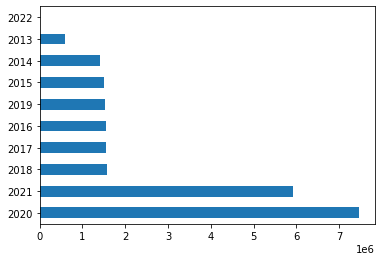

<IPython.core.display.Javascript object>

In [9]:
df.ATTENDANCEDATEYear.value_counts().plot(kind="barh")

In [10]:
df.ATTENDANCEDATEYear.value_counts()

2020    7452996
2021    5920408
2018    1576585
2017    1543119
2016    1541084
2019    1522369
2015    1491934
2014    1402096
2013     584593
2022         22
Name: ATTENDANCEDATEYear, dtype: int64

<IPython.core.display.Javascript object>

In [11]:
df.set_index("ATTENDANCEDATEYear", inplace=True)

<IPython.core.display.Javascript object>

Data validation:
- Find total number of rows (present + absent) for a student in 2019. We can check for a few students in grade 12. They should be in ball park.
- Find total number of rows (present + absent) for a student in 2018. We can check for a few students in grade 12. They should be in ball park. If not, we have to ask Product.


In [12]:
df.loc[2019]["PRESENCE_STATUS_CD"].value_counts()  # .plot(kind="bar")

Absent     1039084
Present     483285
Name: PRESENCE_STATUS_CD, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:>

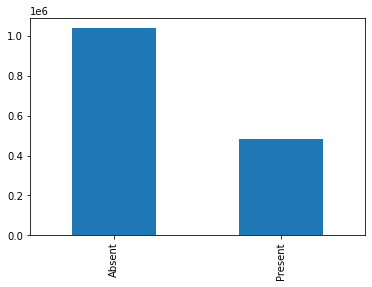

<IPython.core.display.Javascript object>

In [13]:
df.loc[2019]["PRESENCE_STATUS_CD"].value_counts().plot(kind="bar")

In [14]:
df.loc[2018]["PRESENCE_STATUS_CD"].value_counts()  # .plot(kind="bar")

Absent     1101741
Present     474844
Name: PRESENCE_STATUS_CD, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:>

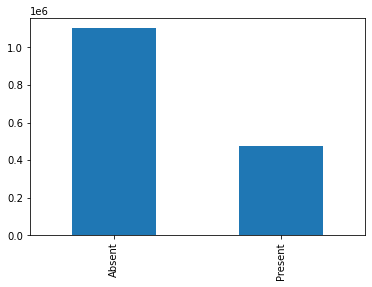

<IPython.core.display.Javascript object>

In [15]:
df.loc[2018]["PRESENCE_STATUS_CD"].value_counts().plot(kind="bar")

In [16]:
df_grade_2019_12 = df.loc[2019][df.loc[2019].GRADE_LEVEL == 12]

<IPython.core.display.Javascript object>

In [17]:
df_grade_2019_12 = df_grade_2019_12.copy()

<IPython.core.display.Javascript object>

In [18]:
df_grade_2019_12.set_index("STUDENTID", inplace=True)

<IPython.core.display.Javascript object>

In [19]:
df_grade_2019_12.loc[79200]["PRESENCE_STATUS_CD"].value_counts()

Absent     30
Present     9
Name: PRESENCE_STATUS_CD, dtype: int64

<IPython.core.display.Javascript object>

In [20]:
def get_attend_count(student_id, df):
    return df.loc[student_id]["PRESENCE_STATUS_CD"].value_counts()

<IPython.core.display.Javascript object>

In [21]:
get_attend_count(79200, df_grade_2019_12)

Absent     30
Present     9
Name: PRESENCE_STATUS_CD, dtype: int64

<IPython.core.display.Javascript object>

In [22]:
df_grade_2019_12.sample(10).index

Int64Index([67115, 140041, 77428, 75714, 76918, 72924, 204855, 76503, 73988,
            79971],
           dtype='int64', name='STUDENTID')

<IPython.core.display.Javascript object>

In [23]:
for idx in df_grade_2019_12.sample(10).index:
    print(get_attend_count(idx, df_grade_2019_12))
    print("------------------------------------------")

Absent     18
Present     5
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     52
Present    31
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     33
Present    15
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     147
Present      5
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     76
Present     1
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     18
Present    15
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     14
Present     4
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     16
Present     7
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     15
Present    13
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent  

<IPython.core.display.Javascript object>

In [24]:
df_grade_2018_12 = df.loc[2018][df.loc[2018].GRADE_LEVEL == 12]

<IPython.core.display.Javascript object>

In [25]:
df_grade_2018_12 = df_grade_2018_12.copy()

<IPython.core.display.Javascript object>

In [26]:
df_grade_2018_12.set_index("STUDENTID", inplace=True)

<IPython.core.display.Javascript object>

In [27]:
df_grade_2018_12.sample(10).index

Int64Index([72185, 70868, 157186, 74810, 77101, 69223, 74485, 71616, 68667,
            174962],
           dtype='int64', name='STUDENTID')

<IPython.core.display.Javascript object>

In [28]:
for idx in df_grade_2018_12.sample(10).index:
    print(get_attend_count(idx, df_grade_2018_12))
    print("------------------------------------------")

Absent    8
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     31
Present     7
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     59
Present    13
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     32
Present    11
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     55
Present     9
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     94
Present    14
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     32
Present     9
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent    131
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     28
Present    14
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     17
Present     6
Name: PRESEN

<IPython.core.display.Javascript object>

Analysis:
- For 2019, let’s sort the students of grade 12 by maximum number of absences
- Find few student ids who are in middle (normal absence rate)
-Identify students with very high absence rate and ask the product
- Analyze an above selected student and count absence by course
- Analyze an above selected student and count absence by period
- Let’s do the above two analysis for a few students with normal absence rate in grade 12 (edited) 

In [29]:
df_2019 = df.loc[2019]

<IPython.core.display.Javascript object>

In [30]:
df_grade_2019_12 = df_2019[df_2019.GRADE_LEVEL == 12].copy()

<IPython.core.display.Javascript object>

In [31]:
df_grade_2019_12_Absent = df_grade_2019_12[
    df_grade_2019_12.PRESENCE_STATUS_CD == "Absent"
].copy()

<IPython.core.display.Javascript object>

In [32]:
df_grade_2019_12_Absent.set_index("STUDENTID", inplace=True)

<IPython.core.display.Javascript object>

In [43]:
df_grade_2019_12_Absent.groupby("STUDENTID").count()[
    "PRESENCE_STATUS_CD"
].sort_values()[::-1].plot(kind="scatter")

ValueError: plot kind scatter can only be used for data frames

<IPython.core.display.Javascript object>

In [34]:
df_mid = (
    df_grade_2019_12_Absent.groupby("STUDENTID")
    .count()["PRESENCE_STATUS_CD"]
    .sort_values()[::-1]
)

<IPython.core.display.Javascript object>

In [35]:
df_mid[df_mid.values < 50][0:20]  #  50 count as mid value from scatter plot

STUDENTID
201303    49
92221     49
73714     49
195322    49
101794    49
74806     49
87996     49
73157     49
76149     49
75873     49
90613     49
74652     49
144079    49
166054    49
73375     49
162269    49
76816     49
73988     49
78740     49
79832     49
Name: PRESENCE_STATUS_CD, dtype: int64

<IPython.core.display.Javascript object>

In [36]:
df_grade_2019_12_Absent.groupby("STUDENTID").count()[
    "PRESENCE_STATUS_CD"
].sort_values()[::-1][
    0:20
]  # top 20 high absent

STUDENTID
67757     414
71274     270
70704     265
77101     240
193393    229
177565    218
158695    215
72326     210
70736     208
69026     205
80080     203
72500     202
164448    195
77334     194
100327    191
219282    188
79227     187
66991     187
182795    187
75599     186
Name: PRESENCE_STATUS_CD, dtype: int64

<IPython.core.display.Javascript object>

In [37]:
df.COURSE_NAME

ATTENDANCEDATEYear
2018              CR American History II
2018                Library/Media Assist
2018    Principles of Business & Finance
2018             Visual Arts (Beginning)
2018          Visual Arts (Intermediate)
                      ...               
2020      Microsoft Word and PowerPoint 
2020      Microsoft Word and PowerPoint 
2020      Microsoft Word and PowerPoint 
2020       Microsoft Word and PowerPoint
2020            Band (Intermediate) Fall
Name: COURSE_NAME, Length: 23035206, dtype: object

<IPython.core.display.Javascript object>

In [38]:
top_20_absent_count_student = (
    df_grade_2019_12_Absent.groupby("STUDENTID")
    .count()["PRESENCE_STATUS_CD"]
    .sort_values()[::-1][0:20]
)

<IPython.core.display.Javascript object>

In [39]:
top_20_absent_count_student.index

Int64Index([ 67757,  71274,  70704,  77101, 193393, 177565, 158695,  72326,
             70736,  69026,  80080,  72500, 164448,  77334, 100327, 219282,
             79227,  66991, 182795,  75599],
           dtype='int64', name='STUDENTID')

<IPython.core.display.Javascript object>

In [40]:
df_heatmap = (
    df_grade_2019_12_Absent.loc[top_20_absent_count_student.index]
    .groupby(["STUDENTID", "COURSE_NAME"])
    .count()["PRESENCE_STATUS_CD"]
    .unstack()
)

<IPython.core.display.Javascript object>

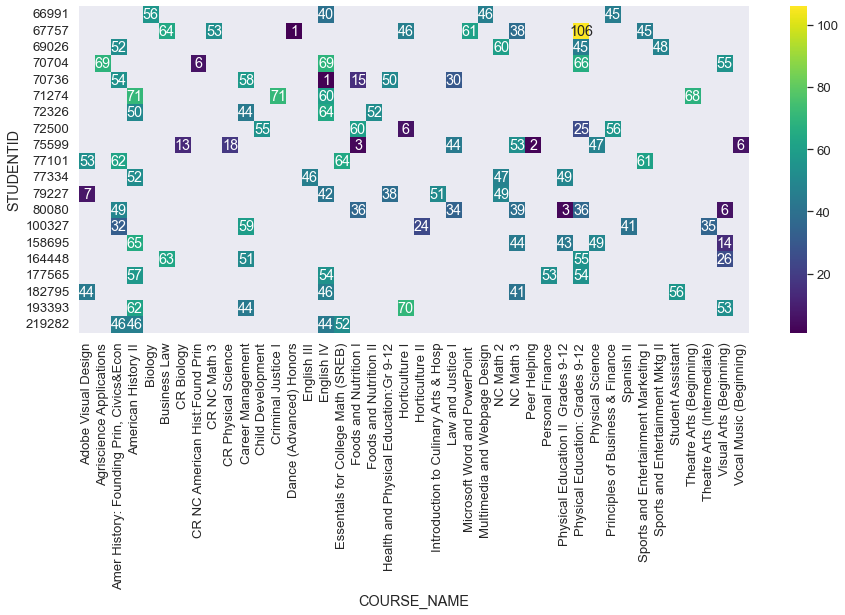

<IPython.core.display.Javascript object>

In [45]:
df_heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(df_heatmap, annot=True, fmt="g", cmap=cm)
plt.show()

In [46]:
mid_20_absent_count_student = df_mid[df_mid.values < 50][0:20]

<IPython.core.display.Javascript object>

In [47]:
mid_20_absent_count_student.index

Int64Index([201303,  92221,  73714, 195322, 101794,  74806,  87996,  73157,
             76149,  75873,  90613,  74652, 144079, 166054,  73375, 162269,
             76816,  73988,  78740,  79832],
           dtype='int64', name='STUDENTID')

<IPython.core.display.Javascript object>

In [48]:
df_heatmap = (
    df_grade_2019_12_Absent.loc[mid_20_absent_count_student.index]
    .groupby(["STUDENTID", "COURSE_NAME"])
    .count()["PRESENCE_STATUS_CD"]
    .unstack()
)

<IPython.core.display.Javascript object>

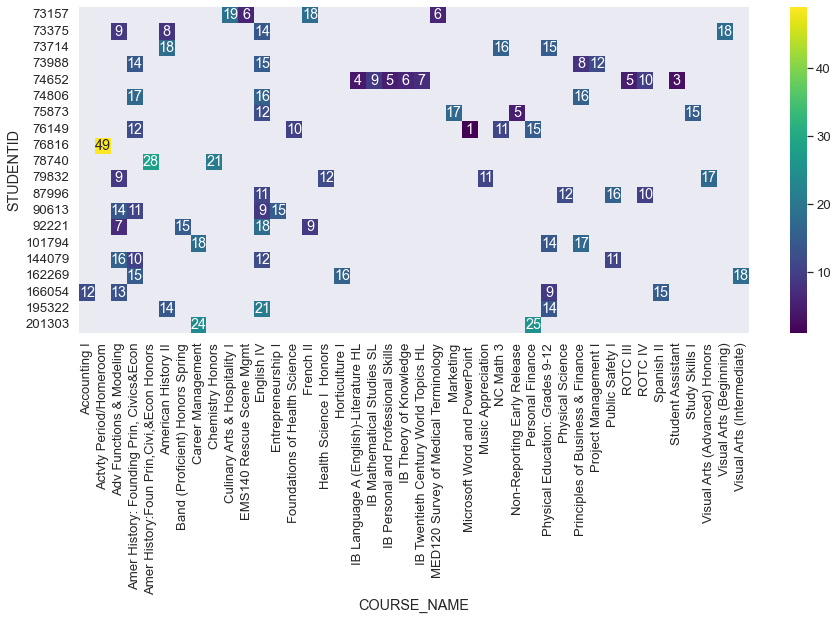

<IPython.core.display.Javascript object>

In [49]:
df_heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(df_heatmap, annot=True, fmt="g", cmap=cm)
plt.show()

In [50]:
list(df_grade_2019_12_Absent.columns)

['Unnamed: 0',
 'SCHOOLYEAR',
 'PRESENCE_STATUS_CD',
 'GRADE_LEVEL',
 'COURSE_NAME',
 'SCHOOLDCID',
 'LASTFIRST',
 'SCHOOLID',
 'STUDENTDCID',
 'SECTIONENROLLMENTDCID',
 'CALENDARDCID',
 'PERIODDCID',
 'PERIODNAME',
 'ATTENDANCECODEDCID',
 'SCHEDULINGTERMYEARDCID',
 'ATTENDANCEMODECODE',
 'TOTALMINUTESATTENDED',
 'ATTENDANCECOMMENT',
 'ATTENDANCE_CODE_DESCRIPTION',
 'ADAVALUECODE',
 'ADAVALUETIME',
 'ADMVALUE',
 'ATTENDANCEFLAGS',
 'SOURCESYSTEMID',
 'ATTENDANCEMODEFLAG',
 'ATTENDANCEDATEMonth',
 'ATTENDANCEDATEWeek',
 'ATTENDANCEDATEDay',
 'ATTENDANCEDATEDayofweek',
 'ATTENDANCEDATEDayofyear',
 'ATTENDANCEDATEIs_month_end',
 'ATTENDANCEDATEIs_month_start',
 'ATTENDANCEDATEIs_quarter_end',
 'ATTENDANCEDATEIs_quarter_start',
 'ATTENDANCEDATEIs_year_end',
 'ATTENDANCEDATEIs_year_start',
 'ATTENDANCEDATEElapsed']

<IPython.core.display.Javascript object>

In [51]:
mid_20_absent_count_student

STUDENTID
201303    49
92221     49
73714     49
195322    49
101794    49
74806     49
87996     49
73157     49
76149     49
75873     49
90613     49
74652     49
144079    49
166054    49
73375     49
162269    49
76816     49
73988     49
78740     49
79832     49
Name: PRESENCE_STATUS_CD, dtype: int64

<IPython.core.display.Javascript object>

In [52]:
top_20_absent_count_student

STUDENTID
67757     414
71274     270
70704     265
77101     240
193393    229
177565    218
158695    215
72326     210
70736     208
69026     205
80080     203
72500     202
164448    195
77334     194
100327    191
219282    188
79227     187
66991     187
182795    187
75599     186
Name: PRESENCE_STATUS_CD, dtype: int64

<IPython.core.display.Javascript object>

In [53]:
df_heatmap = (
    df_grade_2019_12_Absent.groupby(["STUDENTID", "PERIODNAME"]).count()[
        "PRESENCE_STATUS_CD"
    ]
).unstack()

<IPython.core.display.Javascript object>

In [54]:
df_heatmap

PERIODNAME,1,2,3,4,5,7,99,1,2,3,4,5,7,99
STUDENTID,,,,,,,,,,,,,,
54312,11.0,5.0,8.0,11.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN
54313,NaN,5.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
54315,11.0,10.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
54346,16.0,14.0,12.0,NaN,NaN,NaN,NaN,16.0,10.0,14.0,NaN,NaN,NaN,NaN
54477,1.0,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232625,2.0,2.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN
232679,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
233011,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>